In [1]:
!python --version

Python 3.11.12


In [2]:
!pip install pandas==2.0.3
!pip install numpy==1.23.5
!pip install matplotlib==3.7.1
!pip install statsmodels==0.14.0
!pip install scikit-learn==1.2.2
!pip install tensorflow==2.12.0
!pip install pmdarima==2.0.4


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import sklearn
import tensorflow as tf
import pmdarima

# Check the versions of the packages
print("Pandas version:", pd.__version__)
print("Numpy version:", np.__version__)
print("Matplotlib:", matplotlib.__version__)
print("Seaborn version:", sns.__version__)
print("Statsmodels version:", sm.__version__)
print("Scikit-learn version:", sklearn.__version__)
print("TensorFlow version:", tf.__version__)
print("pmdarima version:", pmdarima.__version__)



Pandas version: 2.0.3
Numpy version: 1.23.5
Matplotlib: 3.7.1
Seaborn version: 0.13.2
Statsmodels version: 0.14.0
Scikit-learn version: 1.2.2
TensorFlow version: 2.12.0
pmdarima version: 2.0.4


STEP 2: LOAD DATA

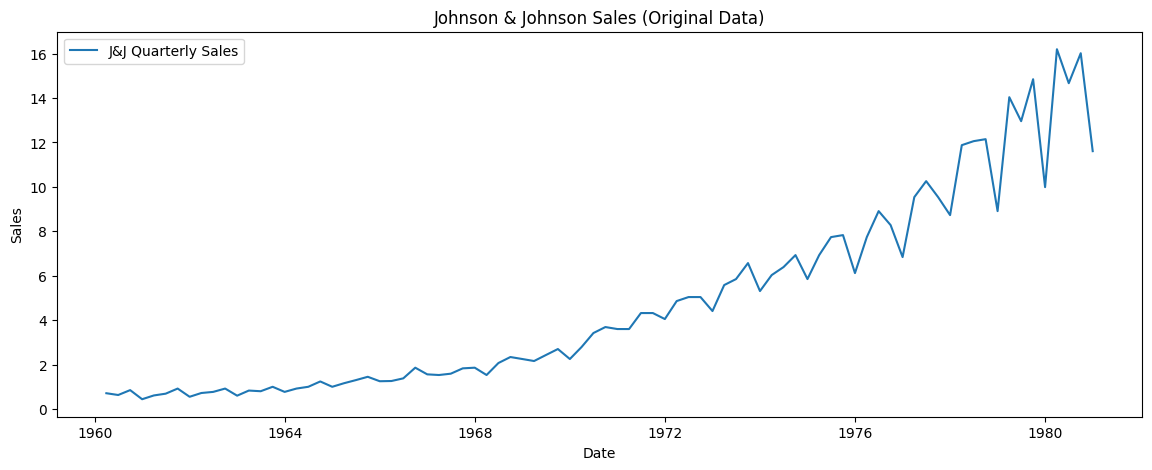

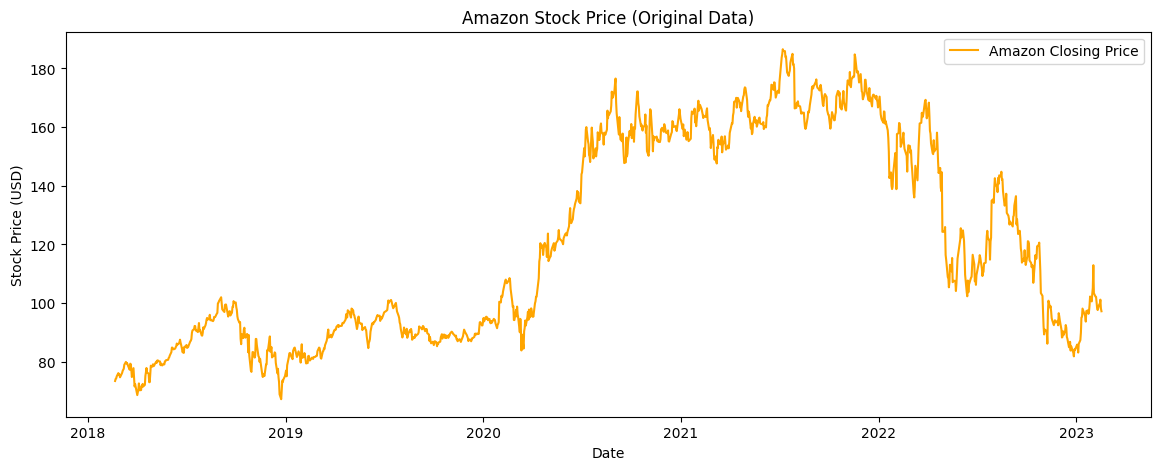

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import boxcox
from statsmodels.tsa.stattools import adfuller

# --- STEP 1: LOAD DATA ---
# Load the data
jj_df = pd.read_csv("/content/jj.csv")  # Johnson & Johnson Sales Data
amzn_df = pd.read_csv("/content/AMZN.csv")  # Amazon Closing Price Data

# --- STEP 2: FORMAT DATE ---
# Format the 'date' column in JJ data to quarterly dates.
jj_df['date'] = pd.date_range(start='1960-01-01', periods=len(jj_df), freq='Q')
jj_df.set_index('date', inplace=True)

# Format the 'Date' column in Amazon data to datetime format and set it as index.
amzn_df['Date'] = pd.to_datetime(amzn_df['Date'])
amzn_df.set_index('Date', inplace=True)

# --- STEP 3: PLOT THE ORIGINAL DATA ---
# Plot JJ Sales (Original Data)
plt.figure(figsize=(14, 5))
plt.plot(jj_df['data'], label="J&J Quarterly Sales")
plt.title("Johnson & Johnson Sales (Original Data)")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()
plt.show()

# Plot Amazon Stock Price (Original Data)
plt.figure(figsize=(14, 5))
plt.plot(amzn_df['Close'], label="Amazon Closing Price", color='orange')
plt.title("Amazon Stock Price (Original Data)")
plt.xlabel("Date")
plt.ylabel("Stock Price (USD)")
plt.legend()
plt.show()



JJ Sales ADF Statistic: 2.7420165734574744, p-value: 1.0
JJ Sales is Non-Stationary

Amazon Stock Price ADF Statistic: -1.6578089913331728, p-value: 0.45297105465166737
Amazon Stock Price is Non-Stationary

JJ Sales Box-Cox Lambda: 0.050710314712169455
First few transformed JJ Sales (Box-Cox):
[-0.3395333  -0.45666475 -0.16185107 -0.80412566 -0.48815276]
Amazon Stock Price Box-Cox Lambda: -0.3699998709183637
First few transformed Amazon Stock Prices (Box-Cox):
[2.15132136 2.15333205 2.15366338 2.15565493 2.15858749]


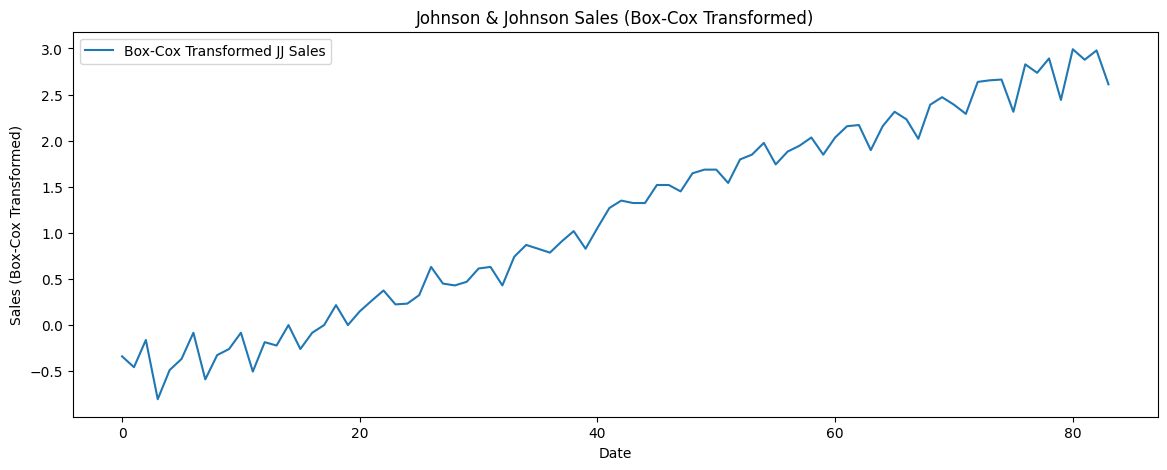

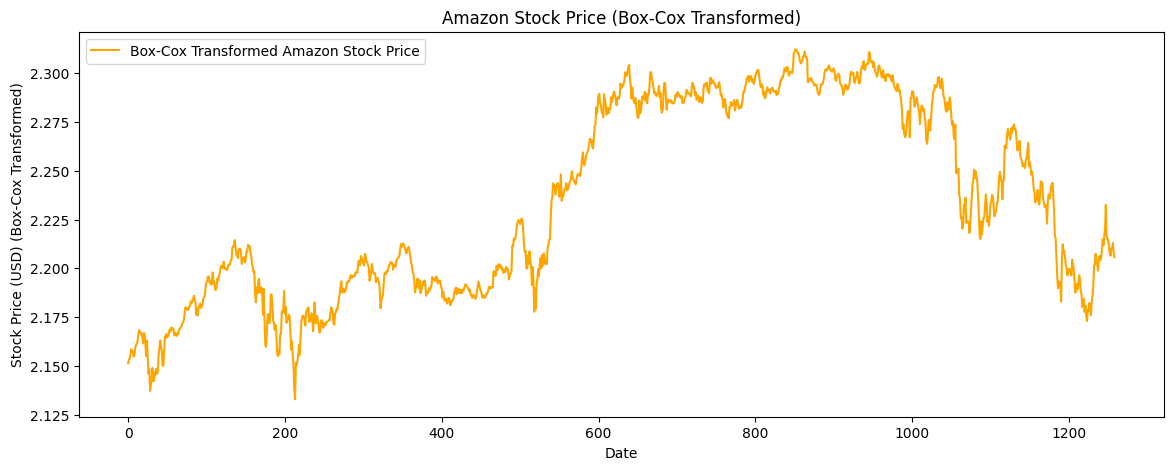

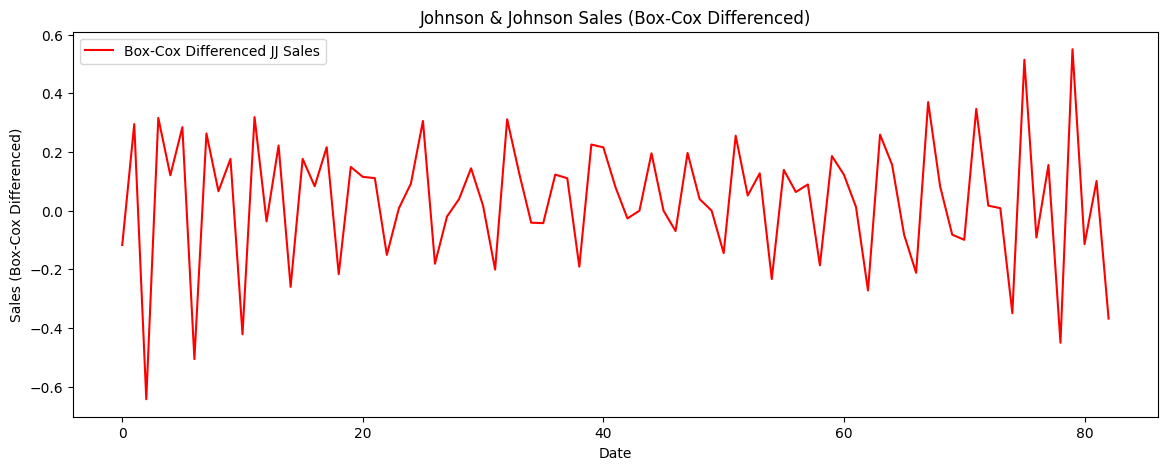

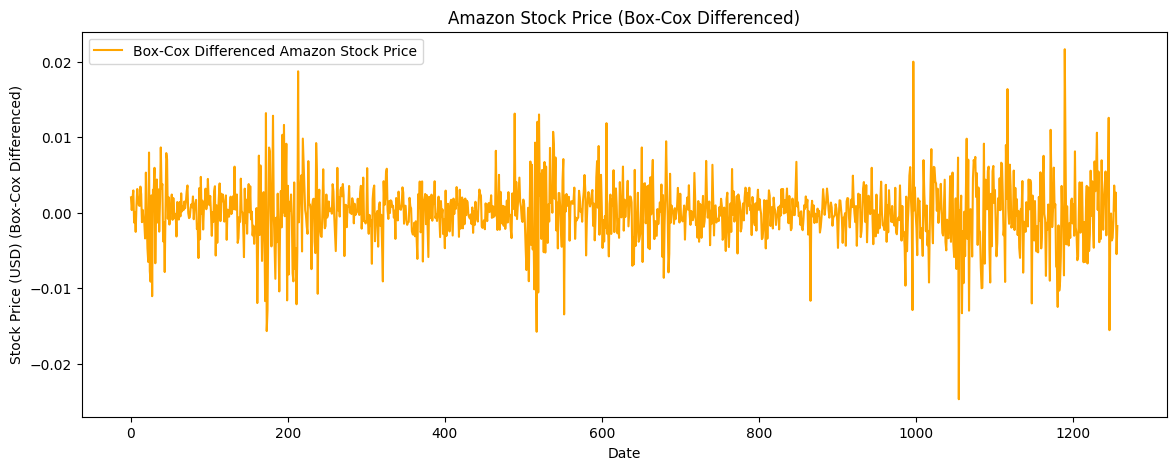

JJ Sales (Box-Cox Differenced) ADF Statistic: -4.3814735509805365, p-value: 0.00032006195939558426
JJ Sales (Box-Cox Differenced) is Stationary

Amazon Stock Price (Box-Cox Differenced) ADF Statistic: -13.829652353331584, p-value: 7.634281177998802e-26
Amazon Stock Price (Box-Cox Differenced) is Stationary



In [5]:
# --- STEP 4: ADF TEST FOR STATIONARITY ---
# ADF test for JJ Sales and Amazon Stock Price
result_jj = adfuller(jj_df['data'].dropna())
print(f"JJ Sales ADF Statistic: {result_jj[0]}, p-value: {result_jj[1]}")
if result_jj[1] <= 0.05:
    print("JJ Sales is Stationary\n")
else:
    print("JJ Sales is Non-Stationary\n")

result_amzn = adfuller(amzn_df['Close'].dropna())
print(f"Amazon Stock Price ADF Statistic: {result_amzn[0]}, p-value: {result_amzn[1]}")
if result_amzn[1] <= 0.05:
    print("Amazon Stock Price is Stationary\n")
else:
    print("Amazon Stock Price is Non-Stationary\n")

# --- STEP 5: APPLY BOX-COX TRANSFORMATION ---
# Apply Box-Cox transformation to Johnson & Johnson Sales (JJ Sales)
jj_sales = jj_df['data']  # The 'data' column is assumed to be the sales column in jj_df
jj_sales_boxcox, jj_lambda_jj = boxcox(jj_sales)
print(f"JJ Sales Box-Cox Lambda: {jj_lambda_jj}")
print(f"First few transformed JJ Sales (Box-Cox):\n{jj_sales_boxcox[:5]}")

# Apply Box-Cox transformation to Amazon Stock Price
amzn_price = amzn_df['Close']  # 'Close' column is the stock price in amzn_df
amzn_price_boxcox, amzn_lambda_amzn = boxcox(amzn_price)
print(f"Amazon Stock Price Box-Cox Lambda: {amzn_lambda_amzn}")
print(f"First few transformed Amazon Stock Prices (Box-Cox):\n{amzn_price_boxcox[:5]}")

# --- STEP 6: PLOT THE BOX-COX TRANSFORMED DATA ---
# Plot JJ Sales (Box-Cox Transformed)
plt.figure(figsize=(14, 5))
plt.plot(jj_sales_boxcox, label="Box-Cox Transformed JJ Sales")
plt.title("Johnson & Johnson Sales (Box-Cox Transformed)")
plt.xlabel("Date")
plt.ylabel("Sales (Box-Cox Transformed)")
plt.legend()
plt.show()

# Plot Amazon Stock Price (Box-Cox Transformed)
plt.figure(figsize=(14, 5))
plt.plot(amzn_price_boxcox, label="Box-Cox Transformed Amazon Stock Price", color='orange')
plt.title("Amazon Stock Price (Box-Cox Transformed)")
plt.xlabel("Date")
plt.ylabel("Stock Price (USD) (Box-Cox Transformed)")
plt.legend()
plt.show()

# --- STEP 7: APPLY BOX-COX DIFFERENCING ---
# First difference the Box-Cox transformed data
jj_sales_boxcox_diff = np.diff(jj_sales_boxcox)
amzn_price_boxcox_diff = np.diff(amzn_price_boxcox)

# --- STEP 8: PLOT THE BOX-COX DIFFERENCED DATA ---
# Plot JJ Sales (Box-Cox Differenced)
plt.figure(figsize=(14, 5))
plt.plot(jj_sales_boxcox_diff, label="Box-Cox Differenced JJ Sales", color='red')
plt.title("Johnson & Johnson Sales (Box-Cox Differenced)")
plt.xlabel("Date")
plt.ylabel("Sales (Box-Cox Differenced)")
plt.legend()
plt.show()

# Plot Amazon Stock Price (Box-Cox Differenced)
plt.figure(figsize=(14, 5))
plt.plot(amzn_price_boxcox_diff, label="Box-Cox Differenced Amazon Stock Price", color='orange')
plt.title("Amazon Stock Price (Box-Cox Differenced)")
plt.xlabel("Date")
plt.ylabel("Stock Price (USD) (Box-Cox Differenced)")
plt.legend()
plt.show()

# --- STEP 9: ADF TEST ON DIFFERENCED DATA ---
# ADF test for differenced data of JJ Sales and Amazon Stock Price
result_jj_diff = adfuller(jj_sales_boxcox_diff)
print(f"JJ Sales (Box-Cox Differenced) ADF Statistic: {result_jj_diff[0]}, p-value: {result_jj_diff[1]}")
if result_jj_diff[1] <= 0.05:
    print("JJ Sales (Box-Cox Differenced) is Stationary\n")
else:
    print("JJ Sales (Box-Cox Differenced) is Non-Stationary\n")

result_amzn_diff = adfuller(amzn_price_boxcox_diff)
print(f"Amazon Stock Price (Box-Cox Differenced) ADF Statistic: {result_amzn_diff[0]}, p-value: {result_amzn_diff[1]}")
if result_amzn_diff[1] <= 0.05:
    print("Amazon Stock Price (Box-Cox Differenced) is Stationary\n")
else:
    print("Amazon Stock Price (Box-Cox Differenced) is Non-Stationary\n")


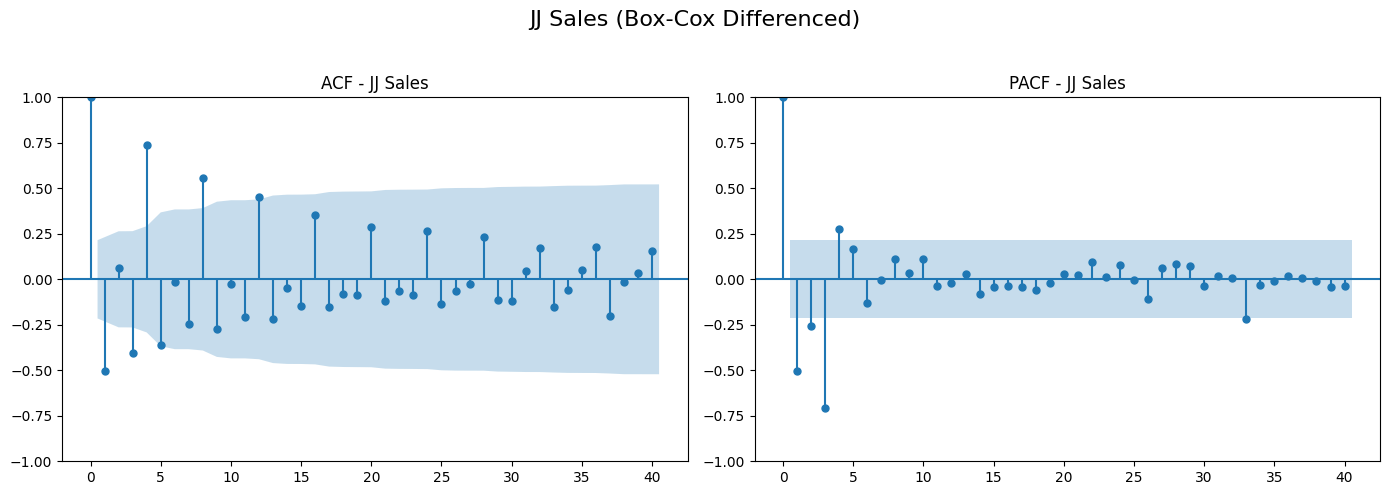

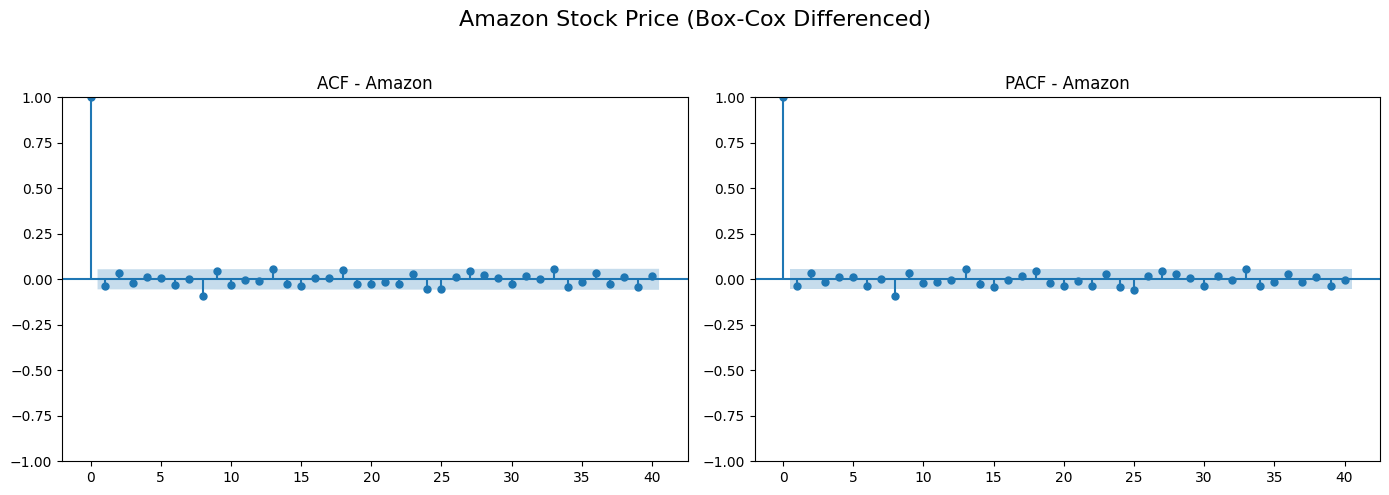

In [7]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# --- ACF & PACF PLOTS FOR JJ SALES ---
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
fig.suptitle("JJ Sales (Box-Cox Differenced)", fontsize=16)

plot_acf(jj_sales_boxcox_diff, ax=axes[0], lags=40, alpha=0.05, title="ACF - JJ Sales")
plot_pacf(jj_sales_boxcox_diff, ax=axes[1], lags=40, alpha=0.05, method='ywm', title="PACF - JJ Sales")

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

# --- ACF & PACF PLOTS FOR AMAZON STOCK PRICE ---
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
fig.suptitle("Amazon Stock Price (Box-Cox Differenced)", fontsize=16)

plot_acf(amzn_price_boxcox_diff, ax=axes[0], lags=40, alpha=0.05, title="ACF - Amazon")
plot_pacf(amzn_price_boxcox_diff, ax=axes[1], lags=40, alpha=0.05, method='ywm', title="PACF - Amazon")

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


In [42]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
import warnings

# Suppress warnings for cleaner output
warnings.filterwarnings("ignore")

# ---------------------------------------------------
# Function: Find Best Manual ARMA Model (ARIMA(p,0,q))
# ---------------------------------------------------
def best_manual_arma(data, title, max_p=5, max_q=5):
    best_aic = np.inf
    best_order = None
    best_model = None

    for p in range(max_p + 1):
        for q in range(max_q + 1):
            try:
                model = ARIMA(data, order=(p, 0, q))
                result = model.fit()
                if result.aic < best_aic:
                    best_aic = result.aic
                    best_order = (p, 0, q)
                    best_model = result
            except:
                continue

    print(f"\n{'='*60}")
    print(f"Best Manual ARMA Model for {title}")
    print(f"Model: ARIMA{best_order} | AIC: {best_aic:.2f}")
    print(f"{'-'*60}")
    print(best_model.summary())
    print(f"{'='*60}")
    return best_order, best_model

# -------------------------------------------
# Apply to JJ Sales and Amazon Stock Price
# -------------------------------------------
# Use your preprocessed differenced series
jj_best_order, jj_best_model = best_manual_arma(jj_sales_boxcox_diff, "JJ Sales (Box-Cox Differenced)")
amzn_best_order, amzn_best_model = best_manual_arma(amzn_price_boxcox_diff, "Amazon Stock Price (Box-Cox Differenced)")



Best Manual ARMA Model for JJ Sales (Box-Cox Differenced)
Model: ARIMA(3, 0, 2) | AIC: -144.35
------------------------------------------------------------
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   83
Model:                 ARIMA(3, 0, 2)   Log Likelihood                  79.174
Date:                Fri, 11 Apr 2025   AIC                           -144.348
Time:                        03:42:16   BIC                           -127.416
Sample:                             0   HQIC                          -137.546
                                 - 83                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0406      0.004      9.205      0.00

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pmdarima import auto_arima

# Function to perform Auto ARIMA forecast with Confidence Interval and Plot
def forecast_auto_arma_model(data, title, steps=24):
    print(f"\n{'-'*40}\n{title} Forecasting (Auto ARIMA)\n{'-'*40}")

    # Fit the Auto ARIMA model
    auto_model = auto_arima(data, seasonal=False, trace=True, suppress_warnings=True)



# -----------------------------------------
# Forecast using Auto ARIMA for both datasets
# -----------------------------------------
# Please ensure you have preprocessed your data (Box-Cox transformation and differencing)
# Replace jj_sales_boxcox_diff and amzn_price_boxcox_diff with your actual preprocessed series

data_dict = {
    "JJ Sales (Box-Cox Differenced)": jj_sales_boxcox_diff,  # Replace with your actual data for JJ Sales
    "Amazon Stock Price (Box-Cox Differenced)": amzn_price_boxcox_diff  # Replace with your actual data for Amazon Stock Price
}

# Forecast for the next 24 months (steps=24)
for title, data in data_dict.items():
    forecast_auto_arma_model(data, title, steps=24)



----------------------------------------
JJ Sales (Box-Cox Differenced) Forecasting (Auto ARIMA)
----------------------------------------
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=1.53 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-12.345, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=-30.621, Time=0.07 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=-34.023, Time=0.18 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-33.610, Time=0.35 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=-41.227, Time=0.18 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=-44.778, Time=0.40 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=-37.227, Time=0.25 sec
 ARIMA(0,0,3)(0,0,0)[0]             : AIC=-49.005, Time=0.41 sec
 ARIMA(0,0,4)(0,0,0)[0]             : AIC=-82.472, Time=0.49 sec
 ARIMA(1,0,4)(0,0,0)[0]             : AIC=-85.933, Time=1.73 sec
 ARIMA(2,0,4)(0,0,0)[0]             : AIC=-84.563, Time=1.34 sec
 ARIMA(1,0,5)(0,0,0)[0]             : AIC=

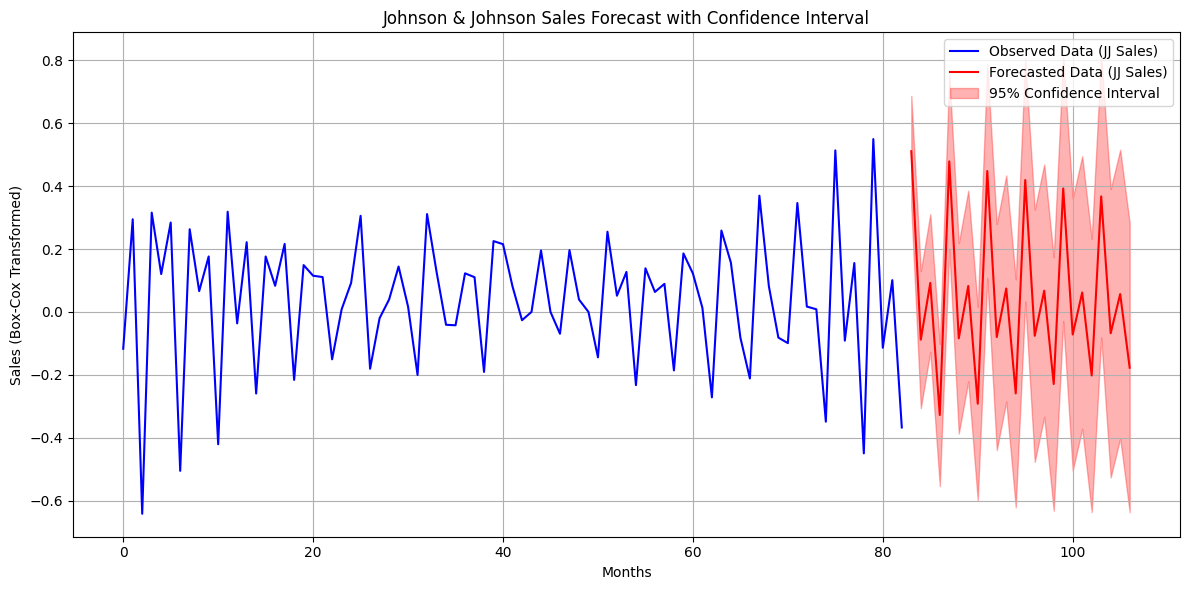

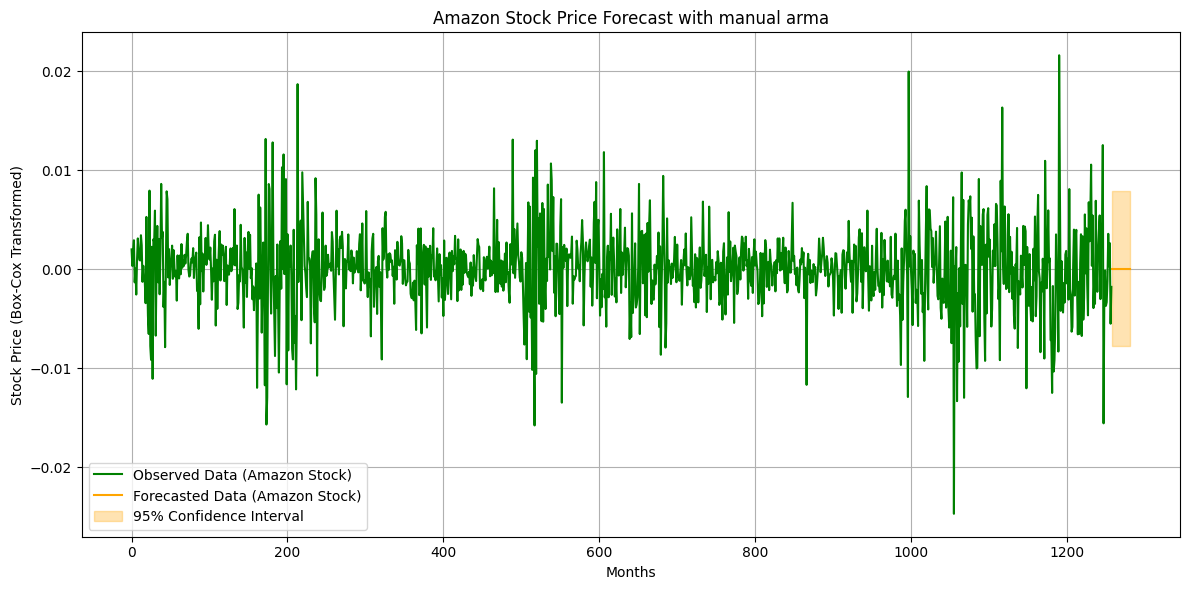

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
import warnings

# Suppress warnings for cleaner output
warnings.filterwarnings("ignore")
# --- Johnson & Johnson ARMA Model (Manual) ---
# Use the best order for JJ Sales (example: (p=1, q=1))
# Convert jj_sales_boxcox_diff to a Pandas Series with the original index
jj_sales_boxcox_diff_series = pd.Series(jj_sales_boxcox_diff, index=jj_df.index[1:])  # Start from index 1 due to diff()

jj_model_manual = ARIMA(jj_sales_boxcox_diff_series.dropna(), order=(3, 0, 2))  # p=3, q=2 as an example
jj_model_manual_fit = jj_model_manual.fit()

# --- Amazon ARMA Model (Manual) ---
# Use the best order for Amazon Stock Price (example: (p=1, q=1))
# Convert amzn_price_boxcox_diff to a Pandas Series with the original index
amzn_price_boxcox_diff_series = pd.Series(amzn_price_boxcox_diff, index=amzn_df.index[1:])  # Start from index 1 due to diff()

amzn_model_manual = ARIMA(amzn_price_boxcox_diff_series.dropna(), order=(0, 0, 0))  # p=1, q=1 as an example
amzn_model_manual_fit = amzn_model_manual.fit()

# --- Forecasting for 24 months ---
n_forecast = 24  # Number of months to forecast

# --- Johnson & Johnson Forecast ---
jj_forecast = jj_model_manual_fit.get_forecast(steps=n_forecast)
jj_predicted_mean = jj_forecast.predicted_mean
jj_conf_int = jj_forecast.conf_int()  # Confidence interval for forecast

# --- Amazon Forecast ---
amzn_forecast = amzn_model_manual_fit.get_forecast(steps=n_forecast)
amzn_predicted_mean = amzn_forecast.predicted_mean
amzn_conf_int = amzn_forecast.conf_int()  # Confidence interval for forecast

# --- Plotting for Johnson & Johnson ---
plt.figure(figsize=(12, 6))
plt.plot(jj_sales_boxcox_diff, label="Observed Data (JJ Sales)", color='blue')
plt.plot(np.arange(len(jj_sales_boxcox_diff), len(jj_sales_boxcox_diff) + n_forecast),
         jj_predicted_mean, label="Forecasted Data (JJ Sales)", color='red')
plt.fill_between(np.arange(len(jj_sales_boxcox_diff), len(jj_sales_boxcox_diff) + n_forecast),
                 jj_conf_int.iloc[:, 0], jj_conf_int.iloc[:, 1], color='red', alpha=0.3, label="95% Confidence Interval")
plt.title("Johnson & Johnson Sales Forecast with Confidence Interval")
plt.xlabel("Months")
plt.ylabel("Sales (Box-Cox Transformed)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# --- Plotting for Amazon ---
plt.figure(figsize=(12, 6))
plt.plot(amzn_price_boxcox_diff, label="Observed Data (Amazon Stock)", color='green')
plt.plot(np.arange(len(amzn_price_boxcox_diff), len(amzn_price_boxcox_diff) + n_forecast),
         amzn_predicted_mean, label="Forecasted Data (Amazon Stock)", color='orange')
plt.fill_between(np.arange(len(amzn_price_boxcox_diff), len(amzn_price_boxcox_diff) + n_forecast),
                 amzn_conf_int.iloc[:, 0], amzn_conf_int.iloc[:, 1], color='orange', alpha=0.3, label="95% Confidence Interval")
plt.title("Amazon Stock Price Forecast with manual arma")
plt.xlabel("Months")
plt.ylabel("Stock Price (Box-Cox Transformed)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=0.26 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-12.345, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=-30.621, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=-34.023, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-33.610, Time=0.08 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=-41.227, Time=0.07 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=-44.778, Time=0.14 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=-37.227, Time=0.11 sec
 ARIMA(0,0,3)(0,0,0)[0]             : AIC=-49.005, Time=0.10 sec
 ARIMA(0,0,4)(0,0,0)[0]             : AIC=-82.472, Time=0.18 sec
 ARIMA(1,0,4)(0,0,0)[0]             : AIC=-85.933, Time=0.35 sec
 ARIMA(2,0,4)(0,0,0)[0]             : AIC=-84.563, Time=1.00 sec
 ARIMA(1,0,5)(0,0,0)[0]             : AIC=inf, Time=2.34 sec
 ARIMA(0,0,5)(0,0,0)[0]             : AIC=inf, Time=0.65 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=inf, Time=0.31 se

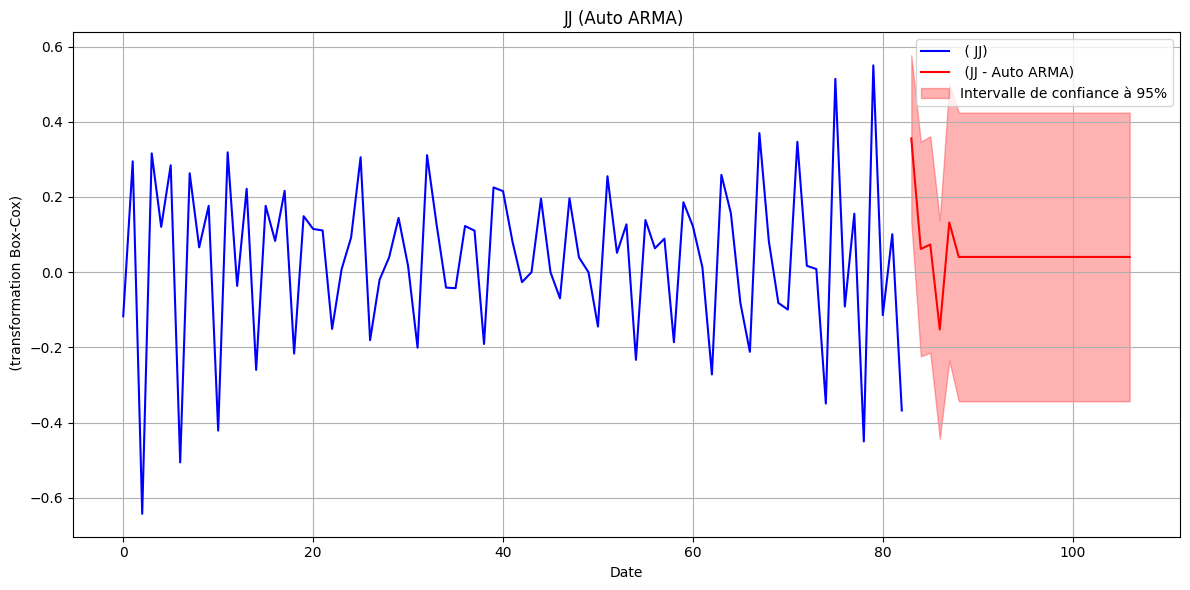

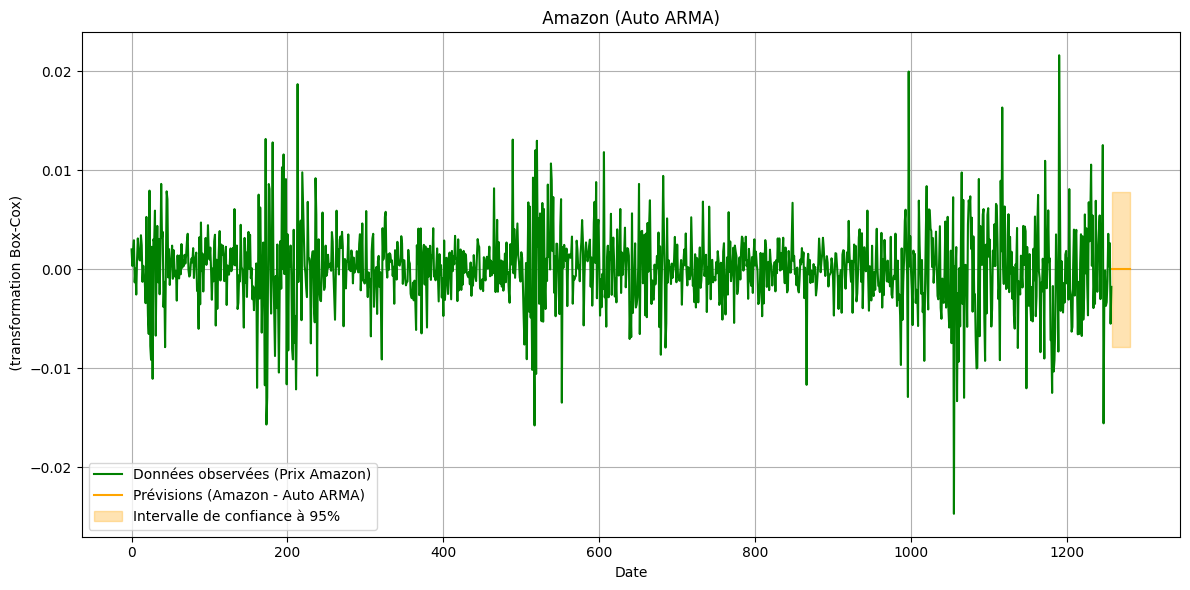

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pmdarima import auto_arima
import warnings

# Suppression des avertissements pour une sortie plus propre
warnings.filterwarnings("ignore")

# --- Chargement et préparation des données ---
# Remplacez ces lignes par le chargement réel de vos données
# Exemple :
# jj_sales_boxcox_diff = pd.read_csv('jj_sales_data.csv')
# amzn_price_boxcox_diff = pd.read_csv('amzn_price_data.csv')

# Conversion en séries pandas si ce sont des tableaux numpy
jj_sales_boxcox_diff_series = pd.Series(jj_sales_boxcox_diff)
amzn_price_boxcox_diff_series = pd.Series(amzn_price_boxcox_diff)

# --- Ajustement des modèles Auto ARIMA ---
# Modèle Auto ARIMA pour les ventes de Johnson & Johnson (p=0, d=0, q=5)
jj_auto_model = auto_arima(jj_sales_boxcox_diff_series.dropna(), p=0, d=0, q=5, seasonal=False, trace=True, suppress_warnings=True)
jj_auto_model_fit = jj_auto_model.fit(jj_sales_boxcox_diff_series.dropna())

# Modèle Auto ARIMA pour les prix des actions Amazon (p=0, d=0, q=0)
amzn_auto_model = auto_arima(amzn_price_boxcox_diff_series.dropna(), p=0, d=0, q=0, seasonal=False, trace=True, suppress_warnings=True)
amzn_auto_model_fit = amzn_auto_model.fit(amzn_price_boxcox_diff_series.dropna())

# --- Prévision pour les 24 prochains mois ---
n_forecast = 24  # Nombre de mois à prévoir

# Prévisions pour Johnson & Johnson
jj_auto_forecast, jj_auto_conf_int = jj_auto_model_fit.predict(n_periods=n_forecast, return_conf_int=True)

# Prévisions pour Amazon
amzn_auto_forecast, amzn_auto_conf_int = amzn_auto_model_fit.predict(n_periods=n_forecast, return_conf_int=True)

# --- Visualisation des résultats ---
# Graphique pour les ventes de Johnson & Johnson
plt.figure(figsize=(12, 6))
plt.plot(jj_sales_boxcox_diff_series, label=" ( JJ)", color='blue')
plt.plot(np.arange(len(jj_sales_boxcox_diff_series), len(jj_sales_boxcox_diff_series) + n_forecast),
         jj_auto_forecast, label=" (JJ - Auto ARMA)", color='red')
plt.fill_between(np.arange(len(jj_sales_boxcox_diff_series), len(jj_sales_boxcox_diff_series) + n_forecast),
                 jj_auto_conf_int[:, 0], jj_auto_conf_int[:, 1], color='red', alpha=0.3, label="Intervalle de confiance à 95%")
plt.title("JJ (Auto ARMA) ")
plt.xlabel("Date")
plt.ylabel(" (transformation Box-Cox)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Graphique pour les prix des actions Amazon
plt.figure(figsize=(12, 6))
plt.plot(amzn_price_boxcox_diff_series, label="Données observées (Prix Amazon)", color='green')
plt.plot(np.arange(len(amzn_price_boxcox_diff_series), len(amzn_price_boxcox_diff_series) + n_forecast),
         amzn_auto_forecast, label="Prévisions (Amazon - Auto ARMA)", color='orange')
plt.fill_between(np.arange(len(amzn_price_boxcox_diff_series), len(amzn_price_boxcox_diff_series) + n_forecast),
                 amzn_auto_conf_int[:, 0], amzn_auto_conf_int[:, 1], color='orange', alpha=0.3, label="Intervalle de confiance à 95%")
plt.title(" Amazon (Auto ARMA) ")
plt.xlabel("Date")
plt.ylabel(" (transformation Box-Cox)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [64]:
pip install numpy pandas matplotlib scikit-learn keras yfinance



Running LSTM & GRU modeling pipeline for: Johnson & Johnson
1/1 [==============================] - 0s 495ms/step
LSTM Test Evaluation:
MAE: 0.23313221907722748
RMSE: 0.29262493486579616
MAPE (%): 147.97008222957498
GRU Test Evaluation:
MAE: 0.2858986784696853
RMSE: 0.33734721081898955
MAPE (%): 324.1209322682455


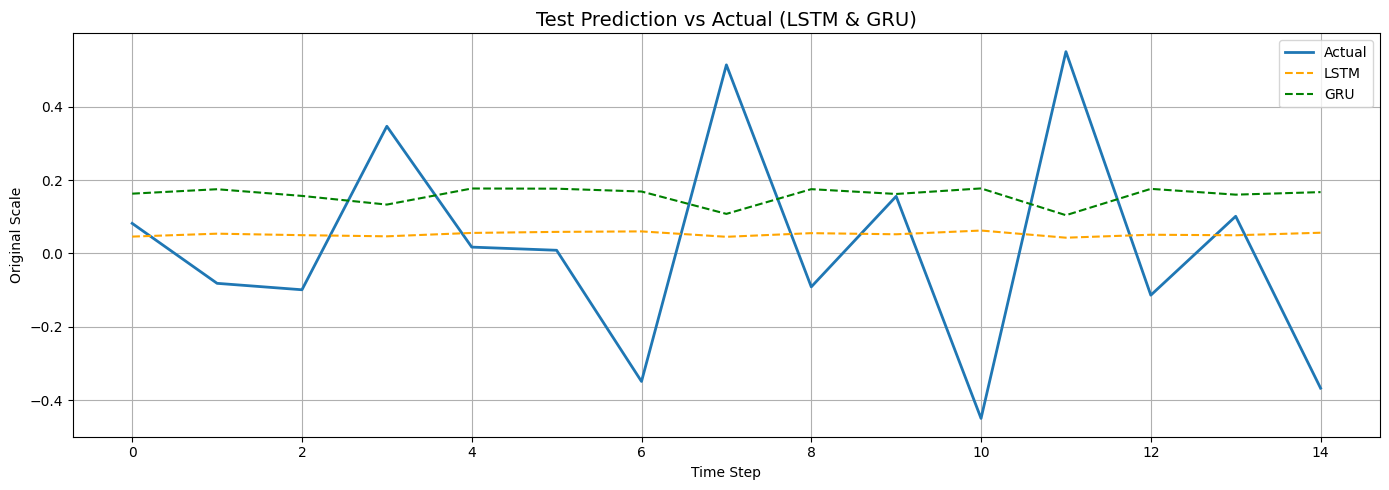

Plotting 24-Month Forecast


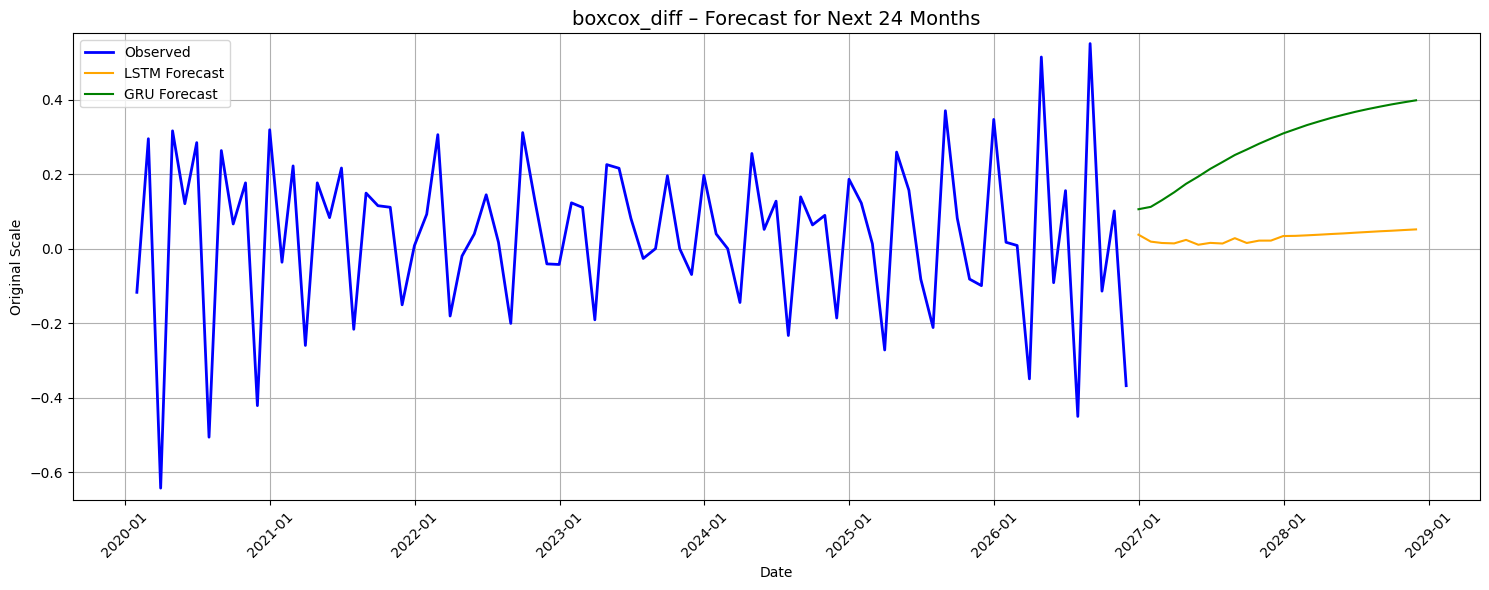


Evaluation Results:

  Model       MAE      RMSE    MAPE (%)
0  LSTM  0.233132  0.292625  147.970082
1   GRU  0.285899  0.337347  324.120932

Running LSTM & GRU modeling pipeline for: Amazon
8/8 [==============================] - 1s 5ms/step
LSTM Test Evaluation:
MAE: 0.004222665025513998
RMSE: 0.005524311062783377
MAPE (%): 146.7769287750692
GRU Test Evaluation:
MAE: 0.00418327720792541
RMSE: 0.0054676592322200875
MAPE (%): 142.92415318354875


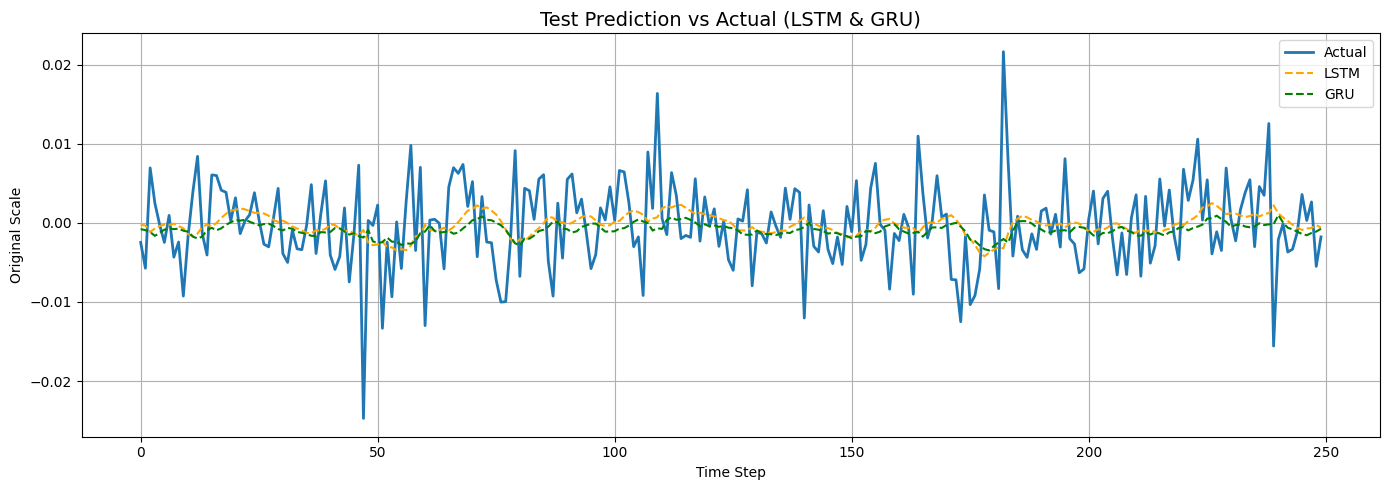

Plotting 24-Month Forecast


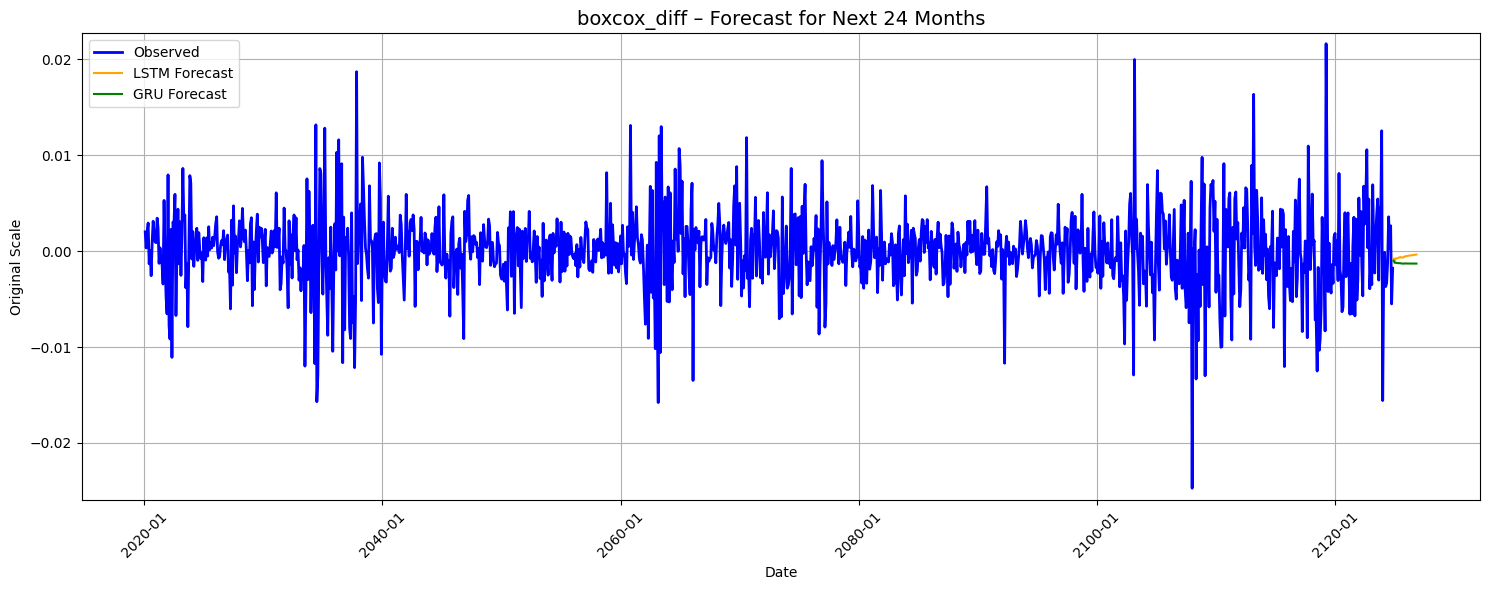


Evaluation Results:

  Model       MAE      RMSE    MAPE (%)
0  LSTM  0.004223  0.005524  146.776929
1   GRU  0.004183  0.005468  142.924153


In [103]:
# --- Importing necessary libraries ---
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.dates as mdates

# --- Hyperparameters ---
lookback = 12  # Lookback period for creating sequences
forecast_horizon = 24  # Number of steps to forecast ahead

# --- Helper: Create sequences ---
def create_sequences(data, lookback):
    X, y = [], []
    for i in range(len(data) - lookback):
        X.append(data[i:i+lookback])
        y.append(data[i+lookback])
    return np.array(X), np.array(y)

# --- Preprocessing ---
def preprocess_series(series, label):
    scaler = MinMaxScaler()
    scaled_series = scaler.fit_transform(series.dropna().values.reshape(-1, 1))

    X, y = create_sequences(scaled_series, lookback)

    # Split into train and test
    train_size = int(len(X) * 0.8)
    X_train, y_train = X[:train_size], y[:train_size]
    X_test, y_test = X[train_size:], y[train_size:]

    return X_train, y_train, X_test, y_test, scaler, scaled_series

# --- LSTM Model ---
def build_lstm_model(input_shape):
    model = Sequential()
    model.add(LSTM(64, activation='tanh', input_shape=input_shape))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    return model

# --- GRU Model ---
def build_gru_model(input_shape):
    model = Sequential()
    model.add(GRU(64, activation='tanh', input_shape=input_shape))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    return model

# --- Recursive Forecast ---
def recursive_forecast(model, last_sequence, steps, scaler):
    forecast = []
    input_seq = last_sequence.copy()
    for _ in range(steps):
        pred = model.predict(input_seq[np.newaxis, :, :], verbose=0)[0, 0]
        forecast.append(pred)
        input_seq = np.append(input_seq[1:], [[pred]], axis=0)
    return scaler.inverse_transform(np.array(forecast).reshape(-1, 1)).flatten()

# --- Evaluation ---
def evaluate(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    return mae, rmse, mape

# --- Test Predictions vs Actual Plot ---
def plot_test_predictions_vs_actual(y_test_orig, lstm_pred, gru_pred):
    plt.figure(figsize=(14, 5))
    plt.plot(y_test_orig, label='Actual', linewidth=2)
    plt.plot(lstm_pred, label='LSTM', linestyle='--', color='orange')
    plt.plot(gru_pred, label='GRU', linestyle='--', color='green')
    plt.title(f'Test Prediction vs Actual (LSTM & GRU)', fontsize=14)
    plt.xlabel('Time Step')
    plt.ylabel('Original Scale')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

# --- Forecast Plot ---
def plot_forecast(series, lstm_forecast, gru_forecast, forecast_horizon):
    future_index = pd.date_range(start=series.dropna().index[-1] + pd.offsets.MonthEnd(), periods=forecast_horizon, freq='M')

    plt.figure(figsize=(15, 6))
    plt.plot(series.index, series.values, label='Observed', linewidth=2, color='blue')
    plt.plot(future_index, lstm_forecast, label='LSTM Forecast', color='orange')
    plt.plot(future_index, gru_forecast, label='GRU Forecast', color='green')
    plt.title(f'{series.name} – Forecast for Next {forecast_horizon} Months', fontsize=14)
    plt.xlabel('Date')
    plt.ylabel('Original Scale')
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
    plt.xticks(rotation=45)

    # Set y-axis limit to match historical + forecast scale
    full_range = np.concatenate([series.dropna().values.flatten(), lstm_forecast, gru_forecast])
    plt.ylim([full_range.min() - 0.05 * abs(full_range.min()), full_range.max() + 0.05 * abs(full_range.max())])

    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# --- Modeling Pipeline ---
def run_lstm_gru_pipeline(name, series):
    print(f"\nRunning LSTM & GRU modeling pipeline for: {name}")

    # Preprocess the series
    X_train, y_train, X_test, y_test, scaler, scaled_series = preprocess_series(series, name)
    early_stop = EarlyStopping(monitor='loss', patience=5, restore_best_weights=True)

    # Train LSTM Model
    lstm_model = build_lstm_model((lookback, 1))
    lstm_model.fit(X_train, y_train, epochs=50, batch_size=16, callbacks=[early_stop], verbose=0)

    # Train GRU Model
    gru_model = build_gru_model((lookback, 1))
    gru_model.fit(X_train, y_train, epochs=50, batch_size=16, callbacks=[early_stop], verbose=0)

    # Predict with LSTM and GRU
    lstm_pred = scaler.inverse_transform(lstm_model.predict(X_test)).flatten()
    gru_pred = scaler.inverse_transform(gru_model.predict(X_test)).flatten()
    y_test_orig = scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()

    # Evaluate the models
    print("LSTM Test Evaluation:")
    print("MAE:", mean_absolute_error(y_test_orig, lstm_pred))
    print("RMSE:", np.sqrt(mean_squared_error(y_test_orig, lstm_pred)))
    print("MAPE (%):", np.mean(np.abs((y_test_orig - lstm_pred) / y_test_orig)) * 100)

    print("GRU Test Evaluation:")
    print("MAE:", mean_absolute_error(y_test_orig, gru_pred))
    print("RMSE:", np.sqrt(mean_squared_error(y_test_orig, gru_pred)))
    print("MAPE (%):", np.mean(np.abs((y_test_orig - gru_pred) / y_test_orig)) * 100)

    # Plot Test Predictions vs Actual
    plot_test_predictions_vs_actual(y_test_orig, lstm_pred, gru_pred)

    # Forecast for the next 24 months (using recursive forecasting)
    last_input = scaled_series[-lookback:]
    lstm_forecast = recursive_forecast(lstm_model, last_input, forecast_horizon, scaler)
    gru_forecast = recursive_forecast(gru_model, last_input, forecast_horizon, scaler)

    # Plot the Forecast
    print(f"Plotting {forecast_horizon}-Month Forecast")
    plot_forecast(series, lstm_forecast, gru_forecast, forecast_horizon)

    # Return the evaluation results
    results = {
        'Model': ['LSTM', 'GRU'],
        'MAE': [mean_absolute_error(y_test_orig, lstm_pred), mean_absolute_error(y_test_orig, gru_pred)],
        'RMSE': [np.sqrt(mean_squared_error(y_test_orig, lstm_pred)), np.sqrt(mean_squared_error(y_test_orig, gru_pred))],
        'MAPE (%)': [np.mean(np.abs((y_test_orig - lstm_pred) / y_test_orig)) * 100, np.mean(np.abs((y_test_orig - gru_pred) / y_test_orig)) * 100],
    }

    results_df = pd.DataFrame(results)
    print("\nEvaluation Results:\n")
    print(results_df)

# --- Run LSTM & GRU Pipeline ---
# Assuming jj_sales_boxcox_diff and amzn_price_boxcox_diff are your preprocessed series
# Convert them to Pandas Series with a DatetimeIndex if they aren't already
jj_data = pd.Series(jj_sales_boxcox_diff, index=pd.date_range('2020-01-01', periods=len(jj_sales_boxcox_diff), freq='M'), name='boxcox_diff')
amzn_data = pd.Series(amzn_price_boxcox_diff, index=pd.date_range('2020-01-01', periods=len(amzn_price_boxcox_diff), freq='M'), name='boxcox_diff')

run_lstm_gru_pipeline("Johnson & Johnson", jj_data)  # Pass the Series directly
run_lstm_gru_pipeline("Amazon", amzn_data)  # Pass the Series directly


COMPUTING AND PLOT PERIODOGRAM

[*********************100%***********************]  2 of 2 completed


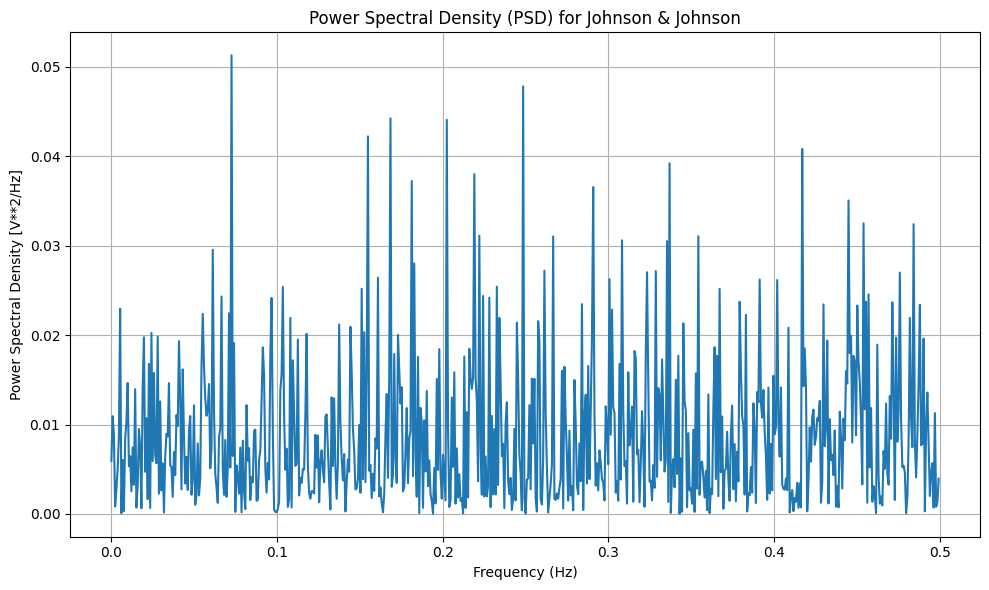

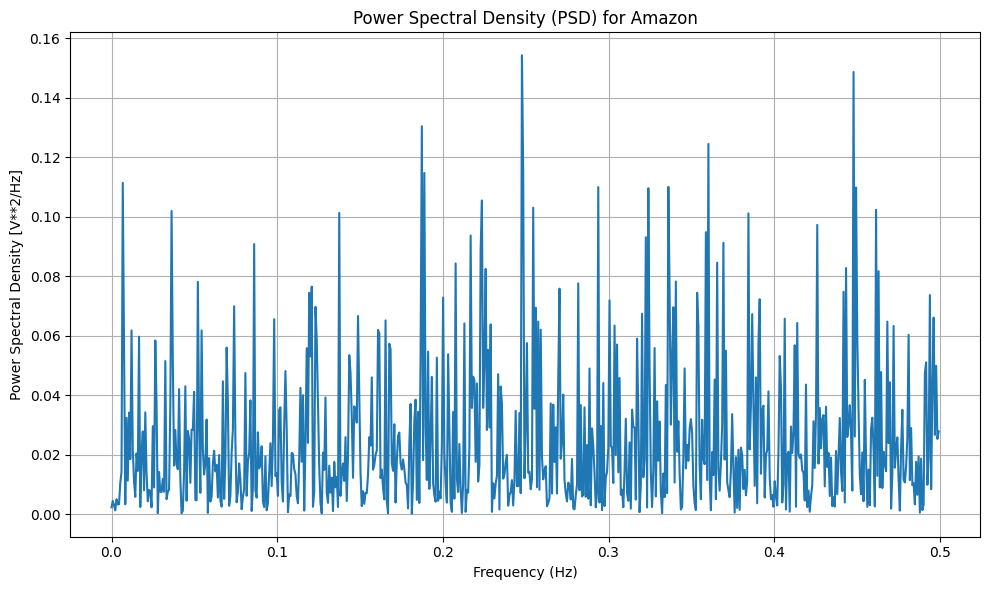

In [120]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq
from sklearn.preprocessing import PowerTransformer
import yfinance as yf

# Function to compute and plot the periodogram using FFT
def plot_fft_psd(series, label):
    # Perform FFT
    N = len(series)
    T = 1.0  # Assuming unit time step for simplicity
    fft_values = fft(series)
    frequencies = fftfreq(N, T)[:N // 2]
    fft_magnitude = np.abs(fft_values)[:N // 2]

    # Compute Power Spectral Density (PSD)
    psd = (fft_magnitude**2) / N

    # Plot the PSD
    plt.figure(figsize=(10, 6))
    plt.plot(frequencies, psd)
    plt.title(f'Power Spectral Density (PSD) for {label}')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Power Spectral Density [V**2/Hz]')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Download historical stock price data for Johnson & Johnson (JNJ) and Amazon (AMZN)
tickers = ['JNJ', 'AMZN']
start_date = '2020-01-01'
end_date = '2025-04-10'

# Download historical data
data = yf.download(tickers, start=start_date, end=end_date)['Close']

# Apply Box-Cox transformation to the data
pt = PowerTransformer(method='box-cox')
transformed_data = pd.DataFrame(pt.fit_transform(data), columns=tickers)

# Compute the first difference
diff_data = transformed_data.diff().dropna()

# Plot PSD for Johnson & Johnson and Amazon
plot_fft_psd(diff_data['JNJ'], 'Johnson & Johnson')
plot_fft_psd(diff_data['AMZN'], 'Amazon')
